<a href="https://colab.research.google.com/github/guebin/PP2023SUM/blob/main/posts/Day2/04_Function, Iteration/ls10.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상 

{{<video https://youtu.be/XlwSIZPcBpM?list=PLQqh36zP38-wGTLMtxeVJrjwevmK1L6Ag  >}}

# imports 

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lambda

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임 

In [127]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

<function __main__.<lambda>(x)>

**(사용방법)**

In [128]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

0

In [129]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

9

In [130]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

16

In [131]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

16

**quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라. 

In [136]:
(lambda x: np.sqrt(x))(2)

1.4142135623730951

`-` 예제2: 람다표현식에 이름을 줄 수 있음. 

In [137]:
f = lambda x: (x-2)**2

In [138]:
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

위의 코드는 아래와 같다. 

In [139]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

(0, 4, 16, 16)

`-` 예제3: 조건부 출력

In [147]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [148]:
f(1,20)

20

**quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 "대문자 입니다"를 리턴하고 소문자이면 "소문자 입니다"를 리턴하는 함수를 구성하라. 

(힌트) 아래코드 이용 

In [153]:
(lambda x: '대문자입니다' if x.isupper() else '소문자입니다')('A')

'대문자입니다'

`-` 예제4: 람다표현식들의 리스트 

In [169]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [45]:
for f in fl: 
    print(f(2))

2
4
8


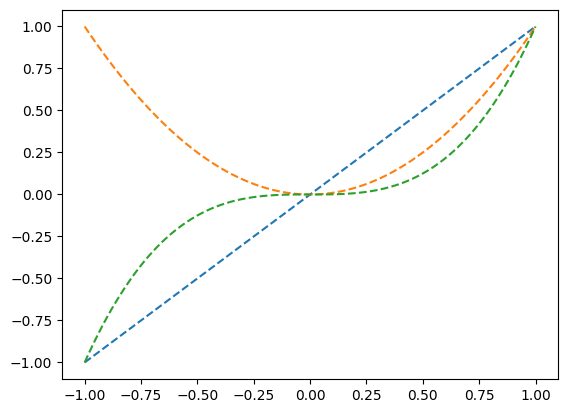

In [188]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리 

In [189]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

{'f1': <function __main__.<lambda>(x)>,
 'f2': <function __main__.<lambda>(x)>,
 'f3': <function __main__.<lambda>(x)>}

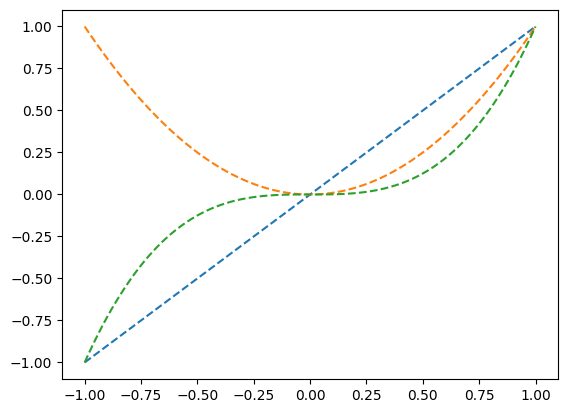

In [195]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수) 

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을 계산해보기 

In [208]:
g = lambda x: x**2 

$g(x)=x^2$

$$g'(x)=gg(x)=2x\approx \frac{g(x+0.001)-g(x)}{0.001}$$

In [209]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [210]:
gg(4)

8.0010000000037

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의 함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다. 

In [228]:
def derivate(g):
    return lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [220]:
x = np.linspace(0,6.28,1000) 

In [223]:
g = lambda x: np.sin(x)

In [224]:
gg = derivate(g) 

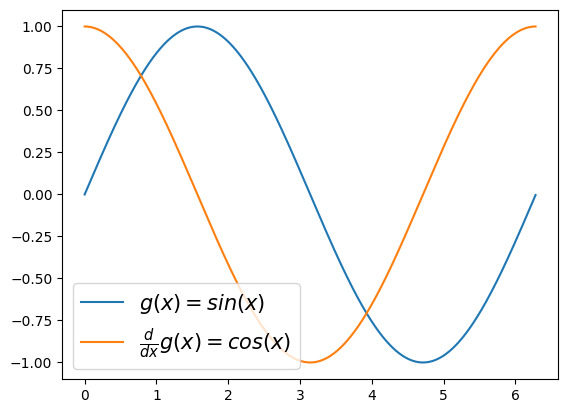

In [225]:
plt.plot(x,g(x),label=r'$g(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}g(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [226]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

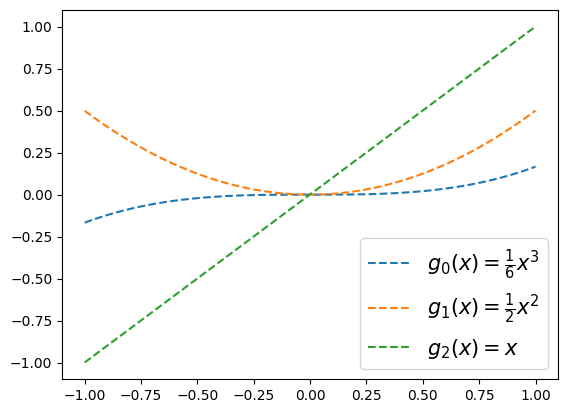

In [227]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현 

In [237]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [238]:
g = lambda x: np.sin(x) 

In [239]:
gg = derivate(g) 

In [240]:
x = np.linspace(0,6.28,1000) 

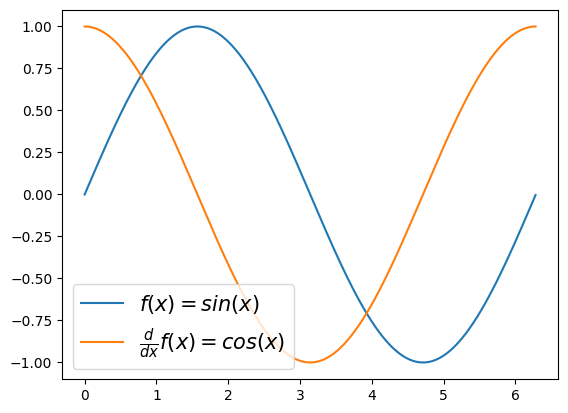

In [241]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [235]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

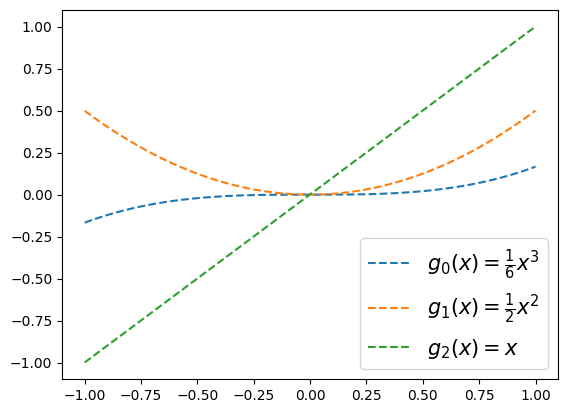

In [236]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

# map

`-` 개념: $\text{map}\left(f,[x_1,x_2,\dots,x_n] \right)=\left[f(x_1),f(x_2),\dots,f(x_n) \right] $

`-` 예제1: 

In [256]:
x = [1,2,3] 
y = list(map(lambda x: x+1 ,x))

(다른구현1)

In [258]:
list(map(lambda x: x+1,[1,2,3]))

[2, 3, 4]

(다른구현2)

In [259]:
[f(xi) for xi in [1,2,3]]

[2, 3, 4]

**quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라. 

In [262]:
list(map(lambda x: x**2,[1,2,3,4,5]))

[1, 4, 9, 16, 25]

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False 
```
입력: A,B,C,a,b,c
출력: T,T,T,F,F,F
```

In [266]:
list(map(lambda x: x.isupper(), list('ABCabc')))

[True, True, True, False, False, False]

In [73]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [74]:
x,y

(['A', 'B', 'C', 'a', 'b', 'c'], [True, True, True, False, False, False])

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트 컴프리헨션보다 조금 편한것 같다) 

In [268]:
f= lambda x,y: x+y 
x=[1,2,3]
y=[-1,-2,-3]

In [269]:
list(map(f,x,y))

[0, 0, 0]

(다른구현)-- 리스트컴프리헨션 

In [282]:
f = lambda x,y: x+y 
[f(xi,yi) for xi,yi in zip(x,y)] 

[0, 0, 0]

**quiz**

In [283]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

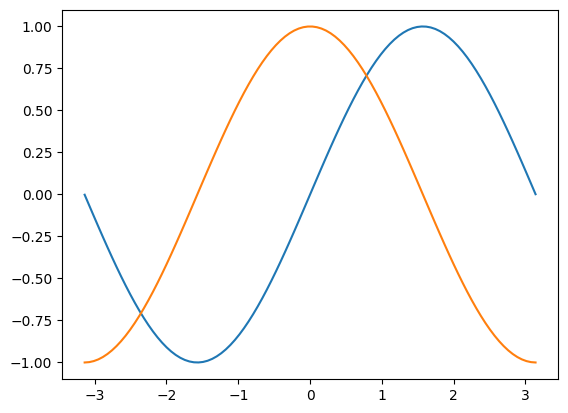

In [287]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고 결과를 시각화 하라. 

In [79]:
f = (lambda x,y: max(x,y))
f(3,4)

4

In [80]:
z= list(map(f,x,y))

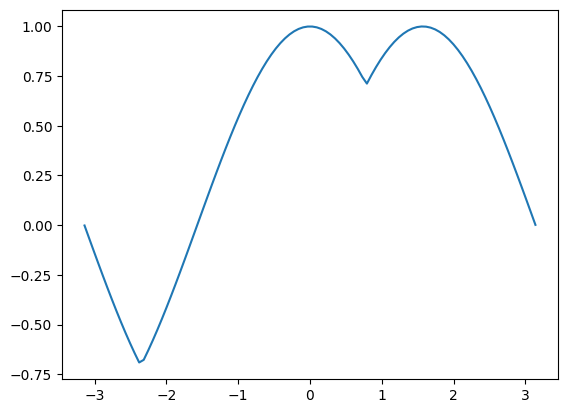

In [81]:
plt.plot(t,z)

`-` 예제4: map은 "하나의 함수에 다양한 입력"을 적용하는 경우에만 사용가능, 리스트컴프리헨션은 "다양한 함수에 다양한 입력" 지원 

In [291]:
flst = [lambda x: x+1, lambda x: x+2, lambda x: x+3] 

map으로 구현시도 $\to$ 실패 

In [303]:
x=[-1,-2,-3]

In [296]:
list(map(flst,x)) # 결과가 0,0,0

TypeError: 'list' object is not callable

리스트컴프리헨션으로 구현시도 $\to$ 성공 

In [316]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

[0, 0, 0]

`-` 종합: map과 리스트컴프리헨션과 비교

- map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은 필요함 
- map은 좀 더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음. 

# `df.apply(집계함수,axis=?)`

**예비학습: 함수의 종류**

`-` 집계함수: 벡터입력 -> 스칼라출력 

In [318]:
input = [1,2,3] 
output = sum(input)

In [319]:
input,output

([1, 2, 3], 6)

`-` 변환함수: 벡터입력 -> 벡터출력 

In [321]:
input = [1,2,3] 
output = list(map(lambda x: x**2, input))

In [322]:
input,output

([1, 2, 3], [1, 4, 9])

---

In [323]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 5, 6, 7],
    'C': [7, 8, 9, 10]
})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


`-` 예제1: column-wise sum을 구하라. 

In [333]:
df.sum()

A    10
B    22
C    34
dtype: int64

In [348]:
df.sum(axis=0)

A    10
B    22
C    34
dtype: int64

In [351]:
df.apply(sum,axis=0)

A    10
B    22
C    34
dtype: int64

`-` 예제2: row-wise sum을 구하라. 

In [352]:
df.sum(axis=1)

0    12
1    15
2    18
3    21
dtype: int64

In [353]:
df.apply(sum,axis=1)

0    12
1    15
2    18
3    21
dtype: int64

`-` 예제3: 모든 col에서 $\frac{1}{2}\big(\min({\bf x}) + \max({\bf x})\big)$를 적용하여 구하라. 

In [357]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [371]:
df.apply(lambda x: (np.min(x)+np.max(x))/2,axis=0)

A    2.5
B    5.5
C    8.5
dtype: float64

`-` 예제4: 모든 row에서 $\frac{1}{2}\big(\min({\bf x}) + \max({\bf x})\big)$를 적용하여 구하라. 

In [373]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [372]:
df.apply(lambda x: (np.min(x)+np.max(x))/2,axis=1)

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64

# `s.apply(변환함수)`

In [374]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 5, 6, 7],
    'C': [7, 8, 9, 10]
})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


`-` 예제1: df.A 열에서 2보다 크면 True, 그렇지 않으면 False를 리턴하는 변환함수를 적용하라.

In [390]:
# 방법1: 컴프리헨션을 이용

In [395]:
[i>2 for i in df.A]

[False, False, True, True]

In [97]:
# 방법2: lambda + map 을 이용

In [397]:
list(map(lambda x: x>2,df.A))

[False, False, True, True]

In [98]:
# 방법3: s.apply 를 이용

In [399]:
df.A.apply(lambda x: x>2)

0    False
1    False
2     True
3     True
Name: A, dtype: bool

`-` 예제2: df.A 열에서 2보다 크면 'H', 그렇지 않으면 'L'을 리턴하는 변환함수를 적용하라.

In [99]:
# 방법1: 컴프리헨션을 이용

In [418]:
f = lambda x: 'H' if x>2 else 'L'
[f(i) for i in df.A]

['L', 'L', 'H', 'H']

In [419]:
# 방법2: lambda + map 을 이용

In [420]:
list(map(lambda x: 'H' if x>2 else 'L',df.A))

['L', 'L', 'H', 'H']

In [101]:
# 방법3: s.apply 를 이용

In [423]:
df.A.apply(lambda x: 'H' if x>2 else 'L')

0    L
1    L
2    H
3    H
Name: A, dtype: object

`-` 예제3: 아래와 같은 pd.Series 를 고려하자. 

In [447]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
s = df.Height
s

0        189cm
1        179cm
2        172cm
3        181cm
4        172cm
         ...  
17655    190cm
17656    195cm
17657    190cm
17658    187cm
17659    186cm
Name: Height, Length: 17660, dtype: object

각각 원소를 int형으로 바꾸는 변환함수를 적용하라. 

In [103]:
# 방법1: s.str.replace().astype() 을 이용

In [452]:
s.str.replace('cm','').astype('int')

0        189
1        179
2        172
3        181
4        172
        ... 
17655    190
17656    195
17657    190
17658    187
17659    186
Name: Height, Length: 17660, dtype: int64

In [104]:
# 방법2: 컴프리헨션을 이용 

In [458]:
# [int(si[:-2]) for si in s]

In [105]:
# 방법3: lambda + map 을 이용

In [464]:
# list(map(lambda x: int(x[:-2]),s))

In [106]:
# 방법4: s.apply(변환함수)를 이용

In [472]:
s.apply(lambda x: int(x[:-2]))

0        189
1        179
2        172
3        181
4        172
        ... 
17655    190
17656    195
17657    190
17658    187
17659    186
Name: Height, Length: 17660, dtype: int64

# `df.applymap(변환함수)`

`-` 예제1: 아래의 데이터 프레임을 고려하자. 

In [473]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [4, 5, 6, 7],
    'C': [7, 8, 9, 10]
})
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [476]:
df.applymap(lambda x: np.sqrt(x)+1)

,A,B,C
0,2.000000,3.000000,3.645751
1,2.414214,3.236068,3.828427
2,2.732051,3.449490,4.000000
3,3.000000,3.645751,4.162278


각 원소의 값을 판단하여 5보다 크면 'H', 그렇지 않으면 'L'를 리턴하는 함수를 구현하라. 

In [478]:
df.applymap(lambda x: 'H' if x>5 else 'L')

,A,B,C
0,L,L,H
1,L,L,H
2,L,H,H
3,L,H,H


`-` 예제2: 아래의 데이터프레임을 고려하자. 

In [479]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head(n=3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN


`['Height','Weight']` 칼럼을 선택하고 모든 값을 int로 바꾸는 변환을 수행하라. 

In [483]:
df.loc[:,'Height':'Weight'].applymap(lambda x : int(x[:-2]))

,Height,Weight
0,189,82
1,179,69
2,172,69
3,181,70
4,172,68
...,...,...
17655,190,78
17656,195,84
17657,190,82
17658,187,79


# Quiz

In [485]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head(n=3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN


`1`. Position Column을 출력하고 결과를 s로 저장하라.

In [490]:
s= df.Position

`2`. Position Column의 결측치를 제거하라. 

In [495]:
s = s.dropna()

`3`. 아래의 dict를 이용하여 포지션을 좀 더 알기쉽게 정리하는 변환을 수행하라. 

In [510]:
position_dict = {
    'GOALKEEPER':['GK'],
    'DEFENDER':['CB','RCB','LCB','RB','LB','RWB','LWB'],
    'MIDFIELDER':['CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'],
    'FORWARD':['ST','CF','RF','LF','RW','LW','RS','LS'],
    'SUB':['SUB'],
    'RES':['RES']
}

In [518]:
[(k,v) for k,v in position_dict.items()]

[('GOALKEEPER', ['GK']),
 ('DEFENDER', ['CB', 'RCB', 'LCB', 'RB', 'LB', 'RWB', 'LWB']),
 ('MIDFIELDER',
  ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'RAM', 'LAM', 'RM', 'LM']),
 ('FORWARD', ['ST', 'CF', 'RF', 'LF', 'RW', 'LW', 'RS', 'LS']),
 ('SUB', ['SUB']),
 ('RES', ['RES'])]

예를들면 아래와 같이 변환이 수행되어야 한다. 

```
변환전: '<span class="pos pos15">LCM' 
변환후: 'MIDFIELDER'
```

In [521]:
# [k for l in s.apply(lambda x: x.split('>')[-1]) for k,v in position_dict.items() if l in v]

`4`. Age Column을 선택하고 선수들의 평균나이보다 높은사람은 'OB', 그렇지 않은 사람은 'YB' 로 치환하는 변환함수를 수행하라. 

In [526]:
df.Age.apply(lambda x: 'OB' if x>df.Age.mean() else 'YB')

0        OB
1        OB
2        OB
3        OB
4        OB
         ..
17655    YB
17656    YB
17657    OB
17658    YB
17659    YB
Name: Age, Length: 17660, dtype: object

`5`. Height와 Weight 칼럼을 이용하여 BMI를 계산하라. (BMI를 계산하는 수식은 검색을 통하여 확인할 것)

In [537]:
_df = df.loc[:,'Height':'Weight'].applymap(lambda x: int(x[:-2])).eval('BMI= Weight/Height**2')
_df

,Height,Weight,BMI
0,189,82,0.002296
1,179,69,0.002153
2,172,69,0.002332
3,181,70,0.002137
4,172,68,0.002299
...,...,...,...
17655,190,78,0.002161
17656,195,84,0.002209
17657,190,82,0.002271
17658,187,79,0.002259


`6`. `5`의 결과로 계산된 BMI의 평균값을 구하고, 평균값보다 높은사람은 'H' 그렇지 않은 사람은 'L'로 치환하는 변환함수를 수행하라. 

In [542]:
_df.BMI.apply(lambda x : 'H' if x>_df.BMI.mean() else 'L')

0        H
1        L
2        H
3        L
4        H
        ..
17655    L
17656    L
17657    H
17658    L
17659    L
Name: BMI, Length: 17660, dtype: object